# ***Customer behavior Tourism data visualization and KNN classification***

**importing necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix


In [ ]:
# Importing the dataset
data = pd.read_csv('/content/Customer behaviour Tourism.csv')

In [ ]:
data.shape

(11760, 17)

data.shape returns the number of rows and the number of columns of the DataFrame


In [ ]:
data.head(5)

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,Yes,307.0,iOS and Android,38570.0,1,2,Financial,94.0,5993,8,Yes,11,No,1,0.0,8.0
1,1000002,No,367.0,iOS,9765.0,1,1,Financial,61.0,5130,1,No,23,Yes,4,1.0,10.0
2,1000003,Yes,277.0,iOS and Android,48055.0,1,2,Other,92.0,2090,6,Yes,15,No,2,0.0,7.0
3,1000004,No,247.0,iOS,48720.0,1,4,Financial,56.0,2909,1,Yes,11,No,3,0.0,8.0
4,1000005,No,202.0,iOS and Android,20685.0,1,1,Medical,40.0,3468,9,No,12,No,4,1.0,6.0


In [ ]:
data.isnull().sum()

UserID                                            0
Taken_product                                     0
Yearly_avg_view_on_travel_page                  581
preferred_device                                 53
total_likes_on_outstation_checkin_given         381
yearly_avg_Outstation_checkins                   75
member_in_family                                  0
preferred_location_type                          31
Yearly_avg_comment_on_travel_page               206
total_likes_on_outofstation_checkin_received      0
week_since_last_outstation_checkin                0
following_company_page                          103
montly_avg_comment_on_company_page                0
working_flag                                      0
travelling_network_rating                         0
Adult_flag                                        1
Daily_Avg_mins_spend_on_traveling_page            1
dtype: int64

In [ ]:
print(data.interpolate(method='linear', inplace=True, limit_direction="both"))

None


using the interpolate function from pandas to handle null values

In [ ]:
data.isnull().sum()

UserID                                            0
Taken_product                                     0
Yearly_avg_view_on_travel_page                    0
preferred_device                                 53
total_likes_on_outstation_checkin_given           0
yearly_avg_Outstation_checkins                   75
member_in_family                                  0
preferred_location_type                          31
Yearly_avg_comment_on_travel_page                 0
total_likes_on_outofstation_checkin_received      0
week_since_last_outstation_checkin                0
following_company_page                          103
montly_avg_comment_on_company_page                0
working_flag                                      0
travelling_network_rating                         0
Adult_flag                                        0
Daily_Avg_mins_spend_on_traveling_page            0
dtype: int64

In [ ]:
data=data.fillna(data.mode().iloc[0])
data.isnull().sum()

UserID                                          0
Taken_product                                   0
Yearly_avg_view_on_travel_page                  0
preferred_device                                0
total_likes_on_outstation_checkin_given         0
yearly_avg_Outstation_checkins                  0
member_in_family                                0
preferred_location_type                         0
Yearly_avg_comment_on_travel_page               0
total_likes_on_outofstation_checkin_received    0
week_since_last_outstation_checkin              0
following_company_page                          0
montly_avg_comment_on_company_page              0
working_flag                                    0
travelling_network_rating                       0
Adult_flag                                      0
Daily_Avg_mins_spend_on_traveling_page          0
dtype: int64

the interpolate function could not work for other columns, we therefore used mode to fill the null values

In [ ]:
data.describe()

,UserID,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
count,1.176000e+04,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000
mean,1.005880e+06,280.524065,28208.996003,74.722832,6531.699065,3.203571,28.660884,2.712755,0.793963,13.817049
std,3.394964e+03,67.231963,14266.569716,24.183605,4706.613785,2.616365,48.660793,1.082909,0.851794,9.070913
min,1.000001e+06,35.000000,3570.000000,3.000000,1009.000000,0.000000,4.000000,1.000000,0.000000,0.000000
25%,1.002941e+06,232.000000,16496.500000,57.000000,2940.750000,1.000000,17.000000,2.000000,0.000000,8.000000
50%,1.005880e+06,271.000000,28112.500000,75.000000,4948.000000,3.000000,22.000000,3.000000,1.000000,12.000000
75%,1.008820e+06,322.625000,40370.250000,92.000000,8393.250000,5.000000,27.000000,4.000000,1.000000,18.000000
max,1.011760e+06,464.000000,252430.000000,815.000000,20065.000000,11.000000,500.000000,10.000000,3.000000,270.000000


In [ ]:
data.nunique()

UserID                                          11760
Taken_product                                       2
Yearly_avg_view_on_travel_page                    454
preferred_device                                   10
total_likes_on_outstation_checkin_given          8142
yearly_avg_Outstation_checkins                     30
member_in_family                                    7
preferred_location_type                            15
Yearly_avg_comment_on_travel_page                 183
total_likes_on_outofstation_checkin_received     6288
week_since_last_outstation_checkin                 12
following_company_page                              5
montly_avg_comment_on_company_page                161
working_flag                                        3
travelling_network_rating                           5
Adult_flag                                          4
Daily_Avg_mins_spend_on_traveling_page             53
dtype: int64

the nunique() method searches column-wise and returns the number of unique values for each row

In [ ]:
Taken_product={'Yes':1, 'No':0}
data['Taken_product']=data['Taken_product'].map(Taken_product)
data.head()

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,1,307.0,iOS and Android,38570.0,1,2,Financial,94.0,5993,8,Yes,11,No,1,0.0,8.0
1,1000002,0,367.0,iOS,9765.0,1,1,Financial,61.0,5130,1,No,23,Yes,4,1.0,10.0
2,1000003,1,277.0,iOS and Android,48055.0,1,2,Other,92.0,2090,6,Yes,15,No,2,0.0,7.0
3,1000004,0,247.0,iOS,48720.0,1,4,Financial,56.0,2909,1,Yes,11,No,3,0.0,8.0
4,1000005,0,202.0,iOS and Android,20685.0,1,1,Medical,40.0,3468,9,No,12,No,4,1.0,6.0


In [ ]:
one_hot_encoded_data = pd.get_dummies(data, columns = ['preferred_device','preferred_location_type','following_company_page','working_flag'])
one_hot_encoded_data

,UserID,Taken_product,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,...,preferred_location_type_Tour and Travel,preferred_location_type_Trekking,following_company_page_0,following_company_page_1,following_company_page_No,following_company_page_Yes,following_company_page_Yeso,working_flag_0,working_flag_No,working_flag_Yes
0,1000001,1,307.0,38570.0,1,2,94.0,5993,8,11,...,0,0,0,0,0,1,0,0,1,0
1,1000002,0,367.0,9765.0,1,1,61.0,5130,1,23,...,0,0,0,0,1,0,0,0,0,1
2,1000003,1,277.0,48055.0,1,2,92.0,2090,6,15,...,0,0,0,0,0,1,0,0,1,0
3,1000004,0,247.0,48720.0,1,4,56.0,2909,1,11,...,0,0,0,0,0,1,0,0,1,0
4,1000005,0,202.0,20685.0,1,1,40.0,3468,9,12,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11755,1011756,0,279.0,30987.0,23,2,58.0,2616,4,36,...,0,0,0,0,1,0,0,0,1,0
11756,1011757,0,305.0,21510.0,6,1,55.0,10041,4,30,...,0,0,0,0,1,0,0,0,1,0
11757,1011758,0,214.0,5478.0,4,3,103.0,6203,3,40,...,0,0,0,0,0,1,0,0,0,1
11758,1011759,0,382.0,35851.0,2,3,83.0,5444,3,32,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
one_hot_encoded_data.dtypes=='object'

UserID                                          False
Taken_product                                   False
Yearly_avg_view_on_travel_page                  False
total_likes_on_outstation_checkin_given         False
yearly_avg_Outstation_checkins                   True
member_in_family                                 True
Yearly_avg_comment_on_travel_page               False
total_likes_on_outofstation_checkin_received    False
week_since_last_outstation_checkin              False
montly_avg_comment_on_company_page              False
travelling_network_rating                       False
Adult_flag                                      False
Daily_Avg_mins_spend_on_traveling_page          False
preferred_device_ANDROID                        False
preferred_device_Android                        False
preferred_device_Android OS                     False
preferred_device_Laptop                         False
preferred_device_Mobile                         False
preferred_device_Other      

checking  if we still have a string data type on our data frame, as we can see above two culumns still have few entries that contain string data types.

In [ ]:
one_hot_encoded_data['yearly_avg_Outstation_checkins'].unique()

array(['1', '24', '23', '27', '16', '15', '26', '19', '21', '11', '10',
       '25', '12', '18', '29', '22', '14', '20', '28', '17', '13', '*',
       '5', '8', '2', '3', '9', '7', '6', '4'], dtype=object)

In [ ]:
one_hot_encoded_data['member_in_family'].unique()

array(['2', '1', '4', 'Three', '3', '5', '10'], dtype=object)

In [ ]:
one_hot_encoded_data['yearly_avg_Outstation_checkins'].replace('*',30,inplace=True)
one_hot_encoded_data['member_in_family'].replace('Three',3,inplace=True)

replacing string data type with integer or float which enables us to use the scaler method to scale independent variable numerical values

In [ ]:
one_hot_encoded_data.shape

(11760, 46)

In [ ]:
x = one_hot_encoded_data.drop(['Taken_product'], axis=1)
y = one_hot_encoded_data['Taken_product']
x.shape, y.shape

((11760, 45), (11760,))

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
x = pd.DataFrame(x_scaled)
x.head()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,-1.731904,0.393817,0.726274,-0.828506,-0.881805,0.797151,-0.114461,1.833319,-0.362954,-1.581691,...,-0.063345,-0.216815,-0.020624,-0.03196,-1.600462,1.606549,-0.009222,-0.009222,0.426369,-0.426230
1,-1.731609,1.286287,-1.292867,-0.828506,-1.838891,-0.567468,-0.297827,-0.842262,-0.116339,1.188742,...,-0.063345,-0.216815,-0.020624,-0.03196,0.624820,-0.622452,-0.009222,-0.009222,-2.345385,2.346151
2,-1.731314,-0.052419,1.391144,-0.828506,-0.881805,0.714447,-0.943754,1.068868,-0.280749,-0.658214,...,-0.063345,-0.216815,-0.020624,-0.03196,-1.600462,1.606549,-0.009222,-0.009222,0.426369,-0.426230
3,-1.731020,-0.498654,1.437758,-0.828506,1.032367,-0.774228,-0.769737,-0.842262,-0.362954,0.265264,...,-0.063345,-0.216815,-0.020624,-0.03196,-1.600462,1.606549,-0.009222,-0.009222,0.426369,-0.426230
4,-1.730725,-1.168007,-0.527409,-0.828506,-1.838891,-1.435862,-0.650963,2.215545,-0.342403,1.188742,...,-0.063345,-0.216815,-0.020624,-0.03196,0.624820,-0.622452,-0.009222,-0.009222,0.426369,-0.426230


In [ ]:
# Taking 30% data as test and 70% as training data.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state =32)

## Checking Consistency , using Cross Validation

In [ ]:
score = cross_val_score( KNN(n_neighbors = 3), X =X_train , y = y_train, cv = 10)
score

array([0.93567961, 0.92475728, 0.93560146, 0.92102066, 0.91980559,
       0.93681652, 0.93681652, 0.94046173, 0.92466586, 0.94653706])

In [ ]:
# Consistency using Mean and standard deviation in percentage
score.mean()*100, score.std()*100

(93.22162288100604, 0.8549055431437852)

In [ ]:
def Val_score(n_neighbors):
    '''
  takes range of n_neighbors as input
  returns Mean and Standard Deviation for each value of n_neighbors
  '''
    avg = []
    std = []

    for i in n_neighbors:

    # 10 fold cross validation for every value of n_neighbor
      score = cross_val_score( KNN(n_neighbors = i) , X = X_train, y = y_train, cv = 10)

    # adding mean to avg list
      avg.append(score.mean())

    # adding standard deviation to std list
      std.append(score.std())

    return avg, std

In [ ]:
n_neighbors = range(1,30)
mean, std = Val_score(n_neighbors)

## Ploting Mean Validation Score for each K value

Text(0.5, 1.0, 'Mean Validation score')

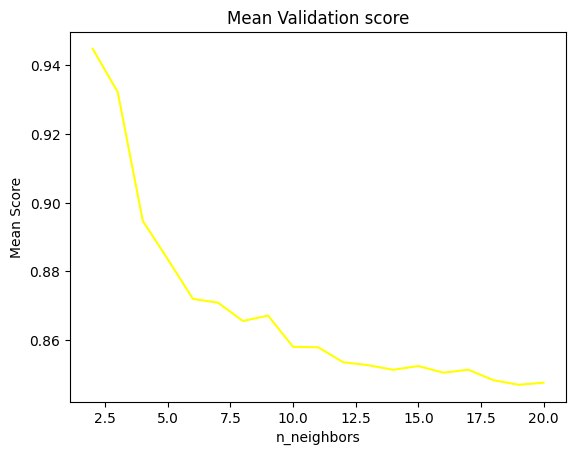

In [ ]:
plt.plot(n_neighbors[1:20], mean[1:20], color = 'yellow', label = 'mean' )
plt.xlabel('n_neighbors')
plt.ylabel('Mean Score')
plt.title('Mean Validation score')

## Ploting Standard Deaviation Validation Score for each K value

Text(0.5, 1.0, 'Standard Deviation of Validation score')

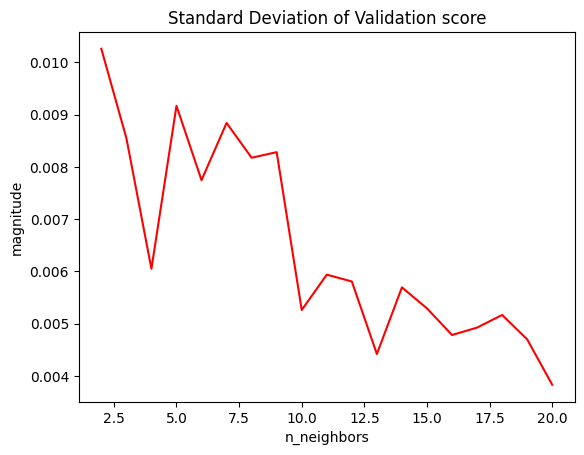

In [ ]:
plt.plot(n_neighbors[1:20], std[1:20], color = 'red', label = 'Standard deviation' )
plt.xlabel('n_neighbors')
plt.ylabel('magnitude')
plt.title('Standard Deviation of Validation score')

In [ ]:
optimal_k =n_neighbors[std.index(min(std))]
print("Optimal K: ", optimal_k)

Optimal K:  29


In [ ]:
clf = KNN(n_neighbors = 1)
clf.fit(X_train, y_train)

score1 = clf.score(X_train, y_train)

score = clf.score(X_test, y_test)
score, score1

(0.9764739229024944, 1.0)

In [ ]:
# Training the model on Optimal K.
clf_optimal = KNN(n_neighbors = 1)
clf_optimal.fit(X_train, y_train)
y_pred = clf_optimal.predict(X_test)
acc = clf_optimal.score(X_test, y_test)


In [ ]:
# Define a function to calculate and display classification metrics:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('accuracy:',acc*100)
print('precision:',precision)
print('recall:',recall)
print('f1_score:',f1)


accuracy: 97.64739229024943
precision: 0.9257884972170687
recall: 0.9206642066420664
f1_score: 0.9232192414431082


Accuracy measures the overall correctness of the model's predictions

Precision measures how many of the predicted positive cases are actually
positive

recall measures how many of the actual positive cases are correctly identified

F1 score is the harmonic mean of precision and recall. It provides a balanced measure between precision and recall



In [ ]:
cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix:\n',cm)

Confusion Matrix:
 [[2946   40]
 [  43  499]]


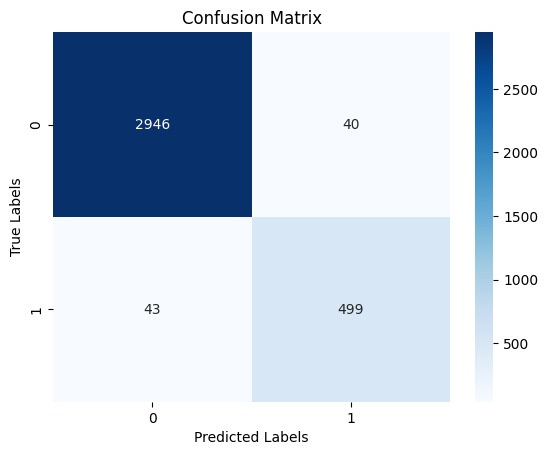

In [ ]:
cm = confusion_matrix(y_test, y_pred)

4. #Visualize the confusion matrix using a heatmap:`python
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
# Define a list of k values to try
k_values = [3, 5, 7, 9, 11,21,25,31,49,91]

# Iterate over the k values
for k in k_values:
  knn = KNN(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print("accuracy:", accuracy)

accuracy: 0.9421768707482994
accuracy: 0.905045351473923
accuracy: 0.875
accuracy: 0.8761337868480725
accuracy: 0.8698979591836735
accuracy: 0.8571428571428571
accuracy: 0.8565759637188208
accuracy: 0.8537414965986394
accuracy: 0.8503401360544217
accuracy: 0.8483560090702947


We can see above that as we keep on changing the k value the accuracy changes as well.In this case the accuracy score decreases as the number of K value increases, but this does not necessarilly mean that everytime the k value increases than accuracy decreases.

The best k value for this data is K=1